In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv('Cleaned_Algerian_forest_dataset.csv')

In [20]:
df=df.drop(['day','month','year'],axis=1).reset_index(drop=True)

In [21]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [26]:
# divide the component
X=df.drop('FWI',axis=1)
y=df['FWI']

In [27]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,1


In [28]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [29]:
# test and split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((162, 11), (81, 11), (162,), (81,))

In [32]:
X_train.corr()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653217,-0.294493,-0.306845,0.686784,0.485957,0.387369,0.600649,0.463775,0.515616,0.260966
RH,-0.653217,1.000000,0.200772,0.218350,-0.633803,-0.416955,-0.240523,-0.718725,-0.365222,-0.444497,-0.419498
Ws,-0.294493,0.200772,1.000000,0.247112,-0.178626,0.008702,0.101059,-0.006136,0.043700,-0.062682,-0.216375
Rain,-0.306845,0.218350,0.247112,1.000000,-0.537842,-0.288821,-0.304050,-0.340753,-0.300830,-0.366668,-0.057620
FFMC,0.686784,-0.633803,-0.178626,-0.537842,1.000000,0.624492,0.528396,0.748319,0.611220,0.782922,0.271324
DMC,0.485957,-0.416955,0.008702,-0.288821,0.624492,1.000000,0.869090,0.685568,0.983366,0.617266,0.222615
DC,0.387369,-0.240523,0.101059,-0.304050,0.528396,0.869090,1.000000,0.514349,0.942305,0.547390,-0.046399
ISI,0.600649,-0.718725,-0.006136,-0.340753,0.748319,0.685568,0.514349,1.000000,0.643968,0.733342,0.304554
BUI,0.463775,-0.365222,0.043700,-0.300830,0.611220,0.983366,0.942305,0.643968,1.000000,0.613711,0.127509
Classes,0.515616,-0.444497,-0.062682,-0.366668,0.782922,0.617266,0.547390,0.733342,0.613711,1.000000,0.197291


## Feature Selection

<AxesSubplot: >

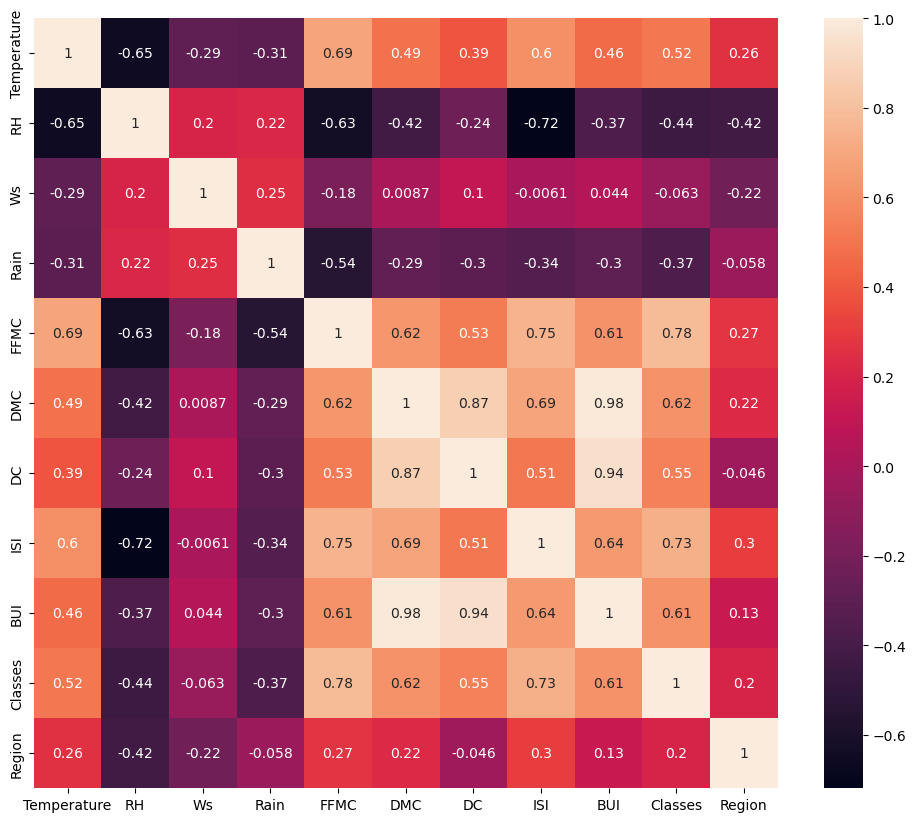

In [33]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)


In [38]:
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [39]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [40]:
corr_features

{'BUI', 'DC'}

In [41]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [42]:
X_train.shape,X_test.shape

((162, 9), (81, 9))

In [43]:
# Featue Scaling or Standar Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

Text(0.5, 1.0, 'X_train After Scaling')

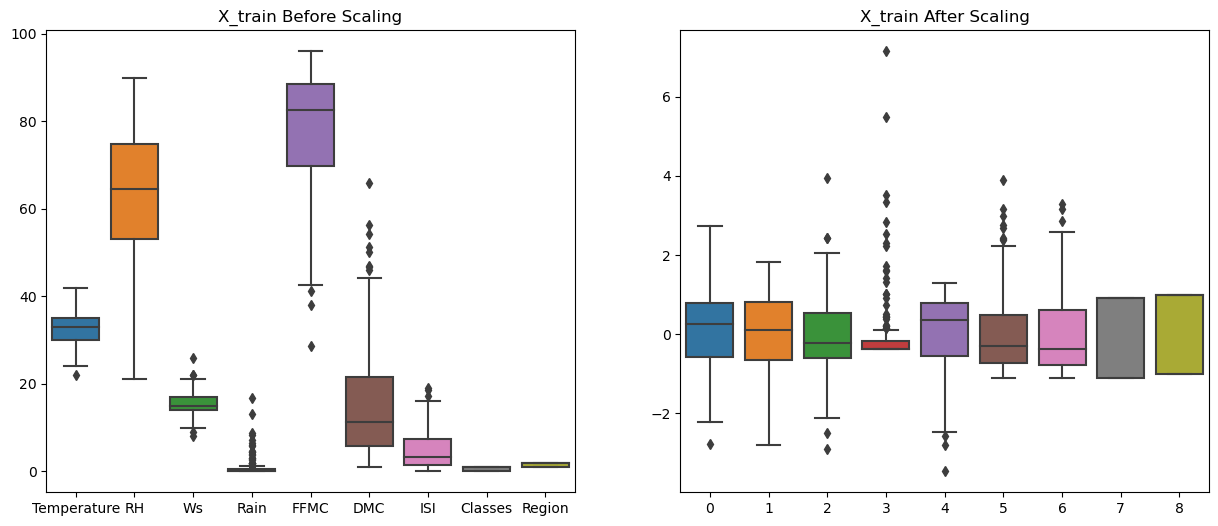

In [49]:
# box plot to check outliers
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title('X_train After Scaling')



# linear regression

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
regression =LinearRegression()
regression.fit(X_train_scaled,y_train)
y_pred_test=regression.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred_test)
score=r2_score(y_test,y_pred_test)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5767877823415978
R2 Score 0.9845563190792226


# Lasso Regression


In [55]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso =Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred_test=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred_test)
score=r2_score(y_test,y_pred_test)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.1053469612945104
R2 Score 0.9514102148198663


# Ridge Regression

In [56]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred_test= ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred_test)
score=r2_score(y_test,y_pred_test)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5953582907340912
R2 Score 0.9839564989246832


In [57]:
# ElasticNet Regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred_test= elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred_test)
score=r2_score(y_test,y_pred_test)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.834545337587552
R2 Score 0.8825431896054333


In [58]:
import pickle

# Assuming 'scaler' and 'regression' are objects you want to save
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))
